In [3]:
print("Hello, World!")

Hello, World!


Given a DataFrame containing sales data (date, region, product, revenue), write a query to find the top 3 products by total revenue in each region.

In [4]:
import pandas as pd

In [6]:
sales_data = [['Amnal','South','phone',1000],['Peter','North','laptop',1500],['Anderson','East','tablet',2000],
              ['Bimal','South','phone',1200],['Louis','North','laptop',1600],['Penny','East','tablet',2500],
              ['Sheldon','South','phone',1100],['Laked','North','laptop',1700],['Qwet','East','tablet',3000]]

df = pd.DataFrame(sales_data,columns=['Salesperson','Region','Product','SalesAmount'])
print(df)

  Salesperson Region Product  SalesAmount
0       Amnal  South   phone         1000
1       Peter  North  laptop         1500
2    Anderson   East  tablet         2000
3       Bimal  South   phone         1200
4       Louis  North  laptop         1600
5       Penny   East  tablet         2500
6     Sheldon  South   phone         1100
7       Laked  North  laptop         1700
8        Qwet   East  tablet         3000


In [7]:
Product_sales = df.groupby('Product')['SalesAmount'].sum().reset_index()
print(Product_sales)

  Product  SalesAmount
0  laptop         4800
1   phone         3300
2  tablet         7500


In [8]:
Product_sales = df.where(df['SalesAmount'] > 1500).groupby('Product')['SalesAmount'].sum().reset_index()    
print(Product_sales)

  Product  SalesAmount
0  laptop       3300.0
1  tablet       7500.0


In [9]:
Product_sales = (
    df.groupby('Product')['SalesAmount']
      .sum()
      .reset_index()
)

highest_product = Product_sales.loc[
    Product_sales['SalesAmount'].idxmax()
]

print(highest_product)
Product_sales = (
    df.groupby('Product')['SalesAmount']
      .sum()
)

Product        tablet
SalesAmount      7500
Name: 2, dtype: object


Q2 How would you replace missing values column-wise, where numeric columns use the median and categorical columns use the most frequent value?

In [10]:
print(df)


  Salesperson Region Product  SalesAmount
0       Amnal  South   phone         1000
1       Peter  North  laptop         1500
2    Anderson   East  tablet         2000
3       Bimal  South   phone         1200
4       Louis  North  laptop         1600
5       Penny   East  tablet         2500
6     Sheldon  South   phone         1100
7       Laked  North  laptop         1700
8        Qwet   East  tablet         3000


In [11]:

print("Shape:", df.shape)
display(df.head(10))              
display(df.tail(5))              



Shape: (9, 4)


,Salesperson,Region,Product,SalesAmount
0,Amnal,South,phone,1000
1,Peter,North,laptop,1500
2,Anderson,East,tablet,2000
3,Bimal,South,phone,1200
4,Louis,North,laptop,1600
5,Penny,East,tablet,2500
6,Sheldon,South,phone,1100
7,Laked,North,laptop,1700
8,Qwet,East,tablet,3000


,Salesperson,Region,Product,SalesAmount
4,Louis,North,laptop,1600
5,Penny,East,tablet,2500
6,Sheldon,South,phone,1100
7,Laked,North,laptop,1700
8,Qwet,East,tablet,3000


In [12]:
df_numeric = df['SalesAmount'].mean()
print("Mean of SalesAmount:", df_numeric)

Mean of SalesAmount: 1733.3333333333333


In [13]:
grouped = df.groupby(['Salesperson', 'Region', 'Product'])
print(grouped['SalesAmount'].sum())

Salesperson  Region  Product
Amnal        South   phone      1000
Anderson     East    tablet     2000
Bimal        South   phone      1200
Laked        North   laptop     1700
Louis        North   laptop     1600
Penny        East    tablet     2500
Peter        North   laptop     1500
Qwet         East    tablet     3000
Sheldon      South   phone      1100
Name: SalesAmount, dtype: int64


Given two DataFrames (orders and customers), perform a left join and then filter customers who have never placed an order.

In [14]:
customers = [[1,'Amnal','South'],[2,'Peter','North'],[3,'Anderson','East',],
              [4,'Bimal','South'],[5,'Louis','North'],[6,'Penny','East'],
              [7,'Sheldon','South'],[8,'Laked','North'],[9,'Qwet','East']]

df = pd.DataFrame(customers,columns=['CustomerID','CustomerName','Region'])
print(df)

orders= [[101,1,'phone',2,1000],[102,4,'laptop',1,1500],[103,5,'tablet',1,2000],
         [104,2,'phone',1,1200],[105,6,'laptop',2,1600],[106,7,'tablet',1,2500],
         [107,3,'phone',3,1100],[108,8,'laptop',1,1700],[109,8,'tablet',2,3000]]
df_orders = pd.DataFrame(orders,columns=['OrderID','CustomerID','Product','Quantity','Price'])
print(df_orders)



   CustomerID CustomerName Region
0           1        Amnal  South
1           2        Peter  North
2           3     Anderson   East
3           4        Bimal  South
4           5        Louis  North
5           6        Penny   East
6           7      Sheldon  South
7           8        Laked  North
8           9         Qwet   East
   OrderID  CustomerID Product  Quantity  Price
0      101           1   phone         2   1000
1      102           4  laptop         1   1500
2      103           5  tablet         1   2000
3      104           2   phone         1   1200
4      105           6  laptop         2   1600
5      106           7  tablet         1   2500
6      107           3   phone         3   1100
7      108           8  laptop         1   1700
8      109           8  tablet         2   3000


In [15]:

merged_df = pd.merge(df,df_orders,on='CustomerID',how='left')
print(merged_df)

   CustomerID CustomerName Region  OrderID Product  Quantity   Price
0           1        Amnal  South    101.0   phone       2.0  1000.0
1           2        Peter  North    104.0   phone       1.0  1200.0
2           3     Anderson   East    107.0   phone       3.0  1100.0
3           4        Bimal  South    102.0  laptop       1.0  1500.0
4           5        Louis  North    103.0  tablet       1.0  2000.0
5           6        Penny   East    105.0  laptop       2.0  1600.0
6           7      Sheldon  South    106.0  tablet       1.0  2500.0
7           8        Laked  North    108.0  laptop       1.0  1700.0
8           8        Laked  North    109.0  tablet       2.0  3000.0
9           9         Qwet   East      NaN     NaN       NaN     NaN


In [16]:
filter_rows = merged_df['OrderID'].isnull()
print(filter_rows)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9     True
Name: OrderID, dtype: bool


Write a Pandas operation to calculate rolling average of 7 days on a time-series column, grouped by product_id.

In [17]:

merged_df['TotalAmount'] = merged_df['Quantity'] * merged_df['Price']


print(merged_df)


   CustomerID CustomerName Region  OrderID Product  Quantity   Price  \
0           1        Amnal  South    101.0   phone       2.0  1000.0   
1           2        Peter  North    104.0   phone       1.0  1200.0   
2           3     Anderson   East    107.0   phone       3.0  1100.0   
3           4        Bimal  South    102.0  laptop       1.0  1500.0   
4           5        Louis  North    103.0  tablet       1.0  2000.0   
5           6        Penny   East    105.0  laptop       2.0  1600.0   
6           7      Sheldon  South    106.0  tablet       1.0  2500.0   
7           8        Laked  North    108.0  laptop       1.0  1700.0   
8           8        Laked  North    109.0  tablet       2.0  3000.0   
9           9         Qwet   East      NaN     NaN       NaN     NaN   

   TotalAmount  
0       2000.0  
1       1200.0  
2       3300.0  
3       1500.0  
4       2000.0  
5       3200.0  
6       2500.0  
7       1700.0  
8       6000.0  
9          NaN  


In [18]:
mean_total = merged_df['TotalAmount'].mean()
print("Mean of TotalAmount:", mean_total)

merged_df['TotalAmount'].fillna(mean_total, inplace=True)
print(merged_df)

Mean of TotalAmount: 2600.0
   CustomerID CustomerName Region  OrderID Product  Quantity   Price  \
0           1        Amnal  South    101.0   phone       2.0  1000.0   
1           2        Peter  North    104.0   phone       1.0  1200.0   
2           3     Anderson   East    107.0   phone       3.0  1100.0   
3           4        Bimal  South    102.0  laptop       1.0  1500.0   
4           5        Louis  North    103.0  tablet       1.0  2000.0   
5           6        Penny   East    105.0  laptop       2.0  1600.0   
6           7      Sheldon  South    106.0  tablet       1.0  2500.0   
7           8        Laked  North    108.0  laptop       1.0  1700.0   
8           8        Laked  North    109.0  tablet       2.0  3000.0   
9           9         Qwet   East      NaN     NaN       NaN     NaN   

   TotalAmount  
0       2000.0  
1       1200.0  
2       3300.0  
3       1500.0  
4       2000.0  
5       3200.0  
6       2500.0  
7       1700.0  
8       6000.0  
9       2

In [71]:
print(merged_df)

   CustomerID CustomerName Region  OrderID Product  Quantity   Price  \
0           1        Amnal  South    101.0   phone       2.0  1000.0   
1           2        Peter  North    104.0   phone       1.0  1200.0   
2           3     Anderson   East    107.0   phone       3.0  1100.0   
3           4        Bimal  South    102.0  laptop       1.0  1500.0   
4           5        Louis  North    103.0  tablet       1.0  2000.0   
5           6        Penny   East    105.0  laptop       2.0  1600.0   
6           7      Sheldon  South    106.0  tablet       1.0  2500.0   
7           8        Laked  North    108.0  laptop       1.0  1700.0   
8           8        Laked  North    109.0  tablet       2.0  3000.0   
9           9         Qwet   East      NaN     NaN       NaN     NaN   

   TotalAmount       days  
0       2000.0     Monday  
1       1200.0    Tuesday  
2       3300.0  Wednesday  
3       1500.0   Thursday  
4       2000.0     Friday  
5       3200.0     Monday  
6       250

In [19]:
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

merged_df['days'] = day_names * (len(merged_df) // len(day_names)) + day_names[:len(merged_df) % len(day_names)]
print(merged_df)

   CustomerID CustomerName Region  OrderID Product  Quantity   Price  \
0           1        Amnal  South    101.0   phone       2.0  1000.0   
1           2        Peter  North    104.0   phone       1.0  1200.0   
2           3     Anderson   East    107.0   phone       3.0  1100.0   
3           4        Bimal  South    102.0  laptop       1.0  1500.0   
4           5        Louis  North    103.0  tablet       1.0  2000.0   
5           6        Penny   East    105.0  laptop       2.0  1600.0   
6           7      Sheldon  South    106.0  tablet       1.0  2500.0   
7           8        Laked  North    108.0  laptop       1.0  1700.0   
8           8        Laked  North    109.0  tablet       2.0  3000.0   
9           9         Qwet   East      NaN     NaN       NaN     NaN   

   TotalAmount       days  
0       2000.0     Monday  
1       1200.0    Tuesday  
2       3300.0  Wednesday  
3       1500.0   Thursday  
4       2000.0     Friday  
5       3200.0     Monday  
6       250

In [20]:
grouped_days = merged_df.groupby('days')['TotalAmount'].mean().reset_index()
print(grouped_days)
    

        days  TotalAmount
0     Friday       2300.0
1     Monday       2600.0
2   Thursday       3750.0
3    Tuesday       1850.0
4  Wednesday       2500.0


How can you detect and remove duplicate rows based on multiple columns, keeping only the latest entry based on timestamp?

In [ ]:
import pandas as pd

customers_df = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8],
    'customer_name': [
        'Amna', 'Peter', 'Anderson', 'Bimal',
        'Louis', 'Penny', 'Sheldon', 'Laked'
    ],0
    'region': [
        'South', 'North', 'East', 'South',
        'North', 'East', 'South', 'North'
    ],
    'product': [
        'Phone', 'Phone', 'Laptop', 'Laptop',
        'Tablet', 'Laptop', 'Tablet', 'Phone'
    ]
})

orders_df = pd.DataFrame({
    'order_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 2, 3],
    'product_id': [201, 201, 202, 202, 203, 202, 203, 201, 203, 202],
    'amount': [2000, 1200, 3300, 1500, 2000, 3200, 2500, 1700, None, 2600],
    'date': pd.to_datetime([
        '2024-01-01', '2024-01-02', '2024-01-03',
        '2024-01-04', '2024-01-05', '2024-01-06',
        '2024-01-07', '2024-01-08', None, '2024-01-10'
    ])
})

# timestamp generate
orders_df['timestamp'] = orders_df['date'] + pd.to_timedelta(
    orders_df.groupby('customer_id').cumcount(), unit='D'
)

# days column
orders_df['days'] = orders_df['date'].dt.day_name()

orders_df

print(customers_df)
print(orders_df)

   customer_id customer_name region product
0            1          Amna  South   Phone
1            2         Peter  North   Phone
2            3      Anderson   East  Laptop
3            4         Bimal  South  Laptop
4            5         Louis  North  Tablet
5            6         Penny   East  Laptop
6            7       Sheldon  South  Tablet
7            8         Laked  North   Phone
   order_id  customer_id  product_id  amount       date  timestamp       days
0       101            1         201  2000.0 2024-01-01 2024-01-01     Monday
1       102            2         201  1200.0 2024-01-02 2024-01-02    Tuesday
2       103            3         202  3300.0 2024-01-03 2024-01-03  Wednesday
3       104            4         202  1500.0 2024-01-04 2024-01-04   Thursday
4       105            5         203  2000.0 2024-01-05 2024-01-05     Friday
5       106            6         202  3200.0 2024-01-06 2024-01-06   Saturday
6       107            7         203  2500.0 2024-01-07 20

In [22]:
df_merged = pd.merge(
    customers_df,
    orders_df,
    on='customer_id',
    how='outer'
)
print(df_merged)

   customer_id customer_name region product  order_id  product_id  amount  \
0            1          Amna  South   Phone       101         201  2000.0   
1            2         Peter  North   Phone       102         201  1200.0   
2            2         Peter  North   Phone       109         203     NaN   
3            3      Anderson   East  Laptop       103         202  3300.0   
4            3      Anderson   East  Laptop       110         202  2600.0   
5            4         Bimal  South  Laptop       104         202  1500.0   
6            5         Louis  North  Tablet       105         203  2000.0   
7            6         Penny   East  Laptop       106         202  3200.0   
8            7       Sheldon  South  Tablet       107         203  2500.0   
9            8         Laked  North   Phone       108         201  1700.0   

        date  timestamp       days  
0 2024-01-01 2024-01-01     Monday  
1 2024-01-02 2024-01-02    Tuesday  
2        NaT        NaT        NaN  
3 20

In [23]:
df_merged.isnull().sum()

customer_id      0
customer_name    0
region           0
product          0
order_id         0
product_id       0
amount           1
date             1
timestamp        1
days             1
dtype: int64

In [24]:

df_merged.dropna(axis=0, inplace=True)
print(df_merged)

   customer_id customer_name region product  order_id  product_id  amount  \
0            1          Amna  South   Phone       101         201  2000.0   
1            2         Peter  North   Phone       102         201  1200.0   
3            3      Anderson   East  Laptop       103         202  3300.0   
4            3      Anderson   East  Laptop       110         202  2600.0   
5            4         Bimal  South  Laptop       104         202  1500.0   
6            5         Louis  North  Tablet       105         203  2000.0   
7            6         Penny   East  Laptop       106         202  3200.0   
8            7       Sheldon  South  Tablet       107         203  2500.0   
9            8         Laked  North   Phone       108         201  1700.0   

        date  timestamp       days  
0 2024-01-01 2024-01-01     Monday  
1 2024-01-02 2024-01-02    Tuesday  
3 2024-01-03 2024-01-03  Wednesday  
4 2024-01-10 2024-01-11  Wednesday  
5 2024-01-04 2024-01-04   Thursday  
6 2024-

In [25]:


print(df_merged)

   customer_id customer_name region product  order_id  product_id  amount  \
0            1          Amna  South   Phone       101         201  2000.0   
1            2         Peter  North   Phone       102         201  1200.0   
3            3      Anderson   East  Laptop       103         202  3300.0   
4            3      Anderson   East  Laptop       110         202  2600.0   
5            4         Bimal  South  Laptop       104         202  1500.0   
6            5         Louis  North  Tablet       105         203  2000.0   
7            6         Penny   East  Laptop       106         202  3200.0   
8            7       Sheldon  South  Tablet       107         203  2500.0   
9            8         Laked  North   Phone       108         201  1700.0   

        date  timestamp       days  
0 2024-01-01 2024-01-01     Monday  
1 2024-01-02 2024-01-02    Tuesday  
3 2024-01-03 2024-01-03  Wednesday  
4 2024-01-10 2024-01-11  Wednesday  
5 2024-01-04 2024-01-04   Thursday  
6 2024-

In [26]:
df_merged.sort_values('timestamp', ascending=False, inplace=True)
print(df_merged)


   customer_id customer_name region product  order_id  product_id  amount  \
4            3      Anderson   East  Laptop       110         202  2600.0   
9            8         Laked  North   Phone       108         201  1700.0   
8            7       Sheldon  South  Tablet       107         203  2500.0   
7            6         Penny   East  Laptop       106         202  3200.0   
6            5         Louis  North  Tablet       105         203  2000.0   
5            4         Bimal  South  Laptop       104         202  1500.0   
3            3      Anderson   East  Laptop       103         202  3300.0   
1            2         Peter  North   Phone       102         201  1200.0   
0            1          Amna  South   Phone       101         201  2000.0   

        date  timestamp       days  
4 2024-01-10 2024-01-11  Wednesday  
9 2024-01-08 2024-01-08     Monday  
8 2024-01-07 2024-01-07     Sunday  
7 2024-01-06 2024-01-06   Saturday  
6 2024-01-05 2024-01-05     Friday  
5 2024-

Given a Column containing mixed data types(strings, numbers, NAN) how would you convert valid numbers to numeric type and set invalid values to NaN

In [27]:
print("Data Types:")

print(df_merged.dtypes)


Data Types:
customer_id               int64
customer_name            object
region                   object
product                  object
order_id                  int64
product_id                int64
amount                  float64
date             datetime64[ns]
timestamp        datetime64[ns]
days                     object
dtype: object


In [28]:
data = {
    'mixed_column': ['100', '200', 'invalid', None, '300', '400abc', '500']
}   
df_mixed = pd.DataFrame(data)
print(df_mixed)
print("data types before conversion:")
print(df_mixed.dtypes)

# Convert the mixed column to numeric, forcing errors to NaN
df_mixed['mixed_column'] = pd.to_numeric(df_mixed['mixed_column'], errors='coerce')
print("data types after conversion:")
print(df_mixed.dtypes)

  mixed_column
0          100
1          200
2      invalid
3         None
4          300
5       400abc
6          500
data types before conversion:
mixed_column    object
dtype: object
data types after conversion:
mixed_column    float64
dtype: object


Create a new column that assigns quartile labels based on a numerical column but independently for each category


In [29]:
import pandas as pd
print(df_merged)

   customer_id customer_name region product  order_id  product_id  amount  \
4            3      Anderson   East  Laptop       110         202  2600.0   
9            8         Laked  North   Phone       108         201  1700.0   
8            7       Sheldon  South  Tablet       107         203  2500.0   
7            6         Penny   East  Laptop       106         202  3200.0   
6            5         Louis  North  Tablet       105         203  2000.0   
5            4         Bimal  South  Laptop       104         202  1500.0   
3            3      Anderson   East  Laptop       103         202  3300.0   
1            2         Peter  North   Phone       102         201  1200.0   
0            1          Amna  South   Phone       101         201  2000.0   

        date  timestamp       days  
4 2024-01-10 2024-01-11  Wednesday  
9 2024-01-08 2024-01-08     Monday  
8 2024-01-07 2024-01-07     Sunday  
7 2024-01-06 2024-01-06   Saturday  
6 2024-01-05 2024-01-05     Friday  
5 2024-

In [30]:
print("helloworld")

helloworld


In [32]:
quartile = [1,2,1,2,1,2,2]
df_merged['quartile'] = quartile * (len(df_merged) // len(quartile)) + quartile[:len(df_merged) % len(quartile)]
print(df_merged)

   customer_id customer_name region product  order_id  product_id  amount  \
4            3      Anderson   East  Laptop       110         202  2600.0   
9            8         Laked  North   Phone       108         201  1700.0   
8            7       Sheldon  South  Tablet       107         203  2500.0   
7            6         Penny   East  Laptop       106         202  3200.0   
6            5         Louis  North  Tablet       105         203  2000.0   
5            4         Bimal  South  Laptop       104         202  1500.0   
3            3      Anderson   East  Laptop       103         202  3300.0   
1            2         Peter  North   Phone       102         201  1200.0   
0            1          Amna  South   Phone       101         201  2000.0   

        date  timestamp       days  quartile  
4 2024-01-10 2024-01-11  Wednesday         1  
9 2024-01-08 2024-01-08     Monday         2  
8 2024-01-07 2024-01-07     Sunday         1  
7 2024-01-06 2024-01-06   Saturday       

In [38]:
grouped_quartile = df_merged.groupby('quartile')['amount'].mean().reset_index()
print(grouped_quartile)

   quartile  amount
0         1  2075.0
1         2  2340.0


how would you reshape a DataFrame from wide to long format when column names contain embedded information

In [46]:


id_vars = [
    'customer_id','customer_name','region','product',
    'order_id','product_id','amount'
]
value_vars = ['date','timestamp','days','quartile']




df_long = df_merged.melt(
    id_vars=id_vars,
    value_vars=value_vars,
    var_name='attribute',
    value_name='value')


print(df_long.head())


   customer_id customer_name region product  order_id  product_id  amount  \
0            3      Anderson   East  Laptop       110         202  2600.0   
1            8         Laked  North   Phone       108         201  1700.0   
2            7       Sheldon  South  Tablet       107         203  2500.0   
3            6         Penny   East  Laptop       106         202  3200.0   
4            5         Louis  North  Tablet       105         203  2000.0   

  attribute                value  
0      date  2024-01-10 00:00:00  
1      date  2024-01-08 00:00:00  
2      date  2024-01-07 00:00:00  
3      date  2024-01-06 00:00:00  
4      date  2024-01-05 00:00:00  


given large csv file read and write and desrcibe and tail and head

In [56]:
import os
data_path = r"C:\Users\syeda\WORK\Microsoft VS Code\WORK\python projects\uk-500.csv"

data = pd.read_csv(data_path)
data.head()
data.describe()

,first_name,last_name,company_name,address,city,county,postal,phone1,phone2,email,web
count,500,500,500,500,500,500,500,500,500,500,500
unique,479,498,498,500,468,102,500,500,500,500,498
top,Erasmo,Devereux,Martin Morrissey,14 Taylor St,Central Ward,Greater London,CT2 7PP,01835-703597,01944-369967,atomkiewicz@hotmail.com,http://www.martinmorrissey.co.uk
freq,3,2,2,1,3,44,1,1,1,1,2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

In [75]:
import os
data_path = r"C:\Users\syeda\WORK\Microsoft VS Code\WORK\python projects\real_estate_price_size.csv"
data = pd.read_csv(data_path)
print(data.head())

        price     size
0  234314.144   643.09
1  228581.528   656.22
2  281626.336   487.29
3  401255.608  1504.75
4  458674.256  1275.46


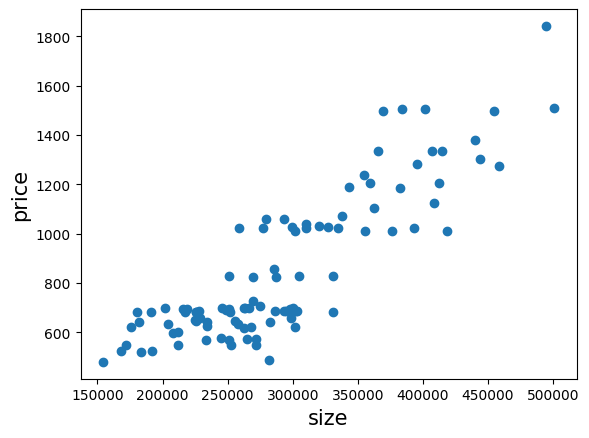

In [136]:
plt.scatter(y,x1)
plt.xlabel('size', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()

In [ ]:

n = len(x_arr)
b1_n = (n * np.sum(x_arr * y_arr) - np.sum(x_arr) * np.sum(y_arr)) / (
    n * np.sum(x_arr**2) - (np.sum(x_arr))**2
)

print(b1_n)


223.17874259460794


In [ ]:

b0 = y_arr.mean() - b1_numpy * x_arr.mean()

print("b0:", b0)

yhat = b0 + b1_numpy * x_arr
print("Predicted y values (yhat):", yhat)



b0: 101912.60180122865
Predicted y values (yhat): [245436.6193764  248366.95626666 210665.37128016 437740.81472046
 386568.16083095 230282.78275422 229323.11416106 240466.42877881
 254178.53072383 256914.70210804 338562.41329885 513121.66681922
 256914.70210804 327155.74776484 392259.21876711 409836.77653386
 256026.45071251 241162.74645571 253912.94802014 331286.78629026
 240441.87911713 224591.72481806 371389.77454709 217603.99838742
 219262.2164449  348145.70850586 229323.11416106 399655.3622967
 253912.94802014 435868.3450701  327396.78080684 253912.94802014
 235351.17199854 219262.2164449  293297.30072581 240946.26307539
 285635.57449254 229180.2797658  254897.16627498 257756.08596762
 329990.11779579 254178.53072383 285635.57449254 399655.3622967
 338562.41329885 257756.08596762 243227.14982471 257756.08596762
 243227.14982471 239625.04491923 246420.83763124 329990.11779579
 329990.11779579 264359.94496099 246420.83763124 438653.61577768
 332246.45488342 388440.63048132 286668.89

In [135]:
SSR = np.sum((y_arr - yhat) ** 2)
SST = np.sum((y_arr - y_arr.mean()) ** 2)
R_squared = 1 - (SSR / SST)
print("R-squared:", R_squared)
print("SSR:", SSR)
print("SST:", SST)


R-squared: 0.7447391865847586
SSR: 150032070866.28915
SST: 587759902740.0532


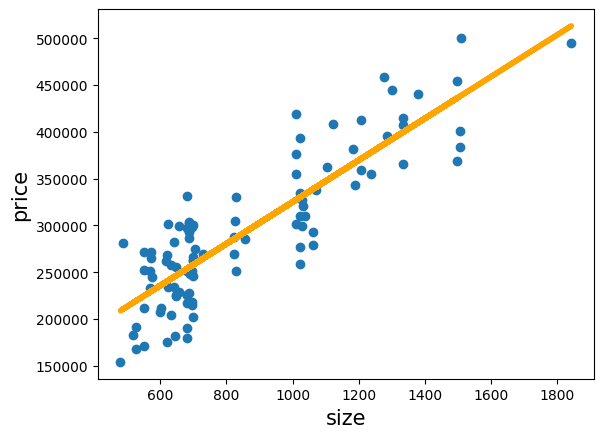

In [85]:
plt.scatter(x1,y)
yhat = 223.1787*x1 + 1.019e+05
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('size', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()

Prediction Model


In [147]:
# ...existing code...
# install if needed (run once)
!pip install -q --upgrade scikit-learn

import sklearn
from sklearn.linear_model import LinearRegression

print("scikit-learn version:", sklearn.__version__)
# ...existing code...

scikit-learn version: 1.8.0


In [151]:
import sklearn
from sklearn.linear_model import LinearRegression as LR

In [152]:
# ...existing code...
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# assume x_arr, y_arr are available 1D numpy arrays
X = x_arr.reshape(-1, 1)   # sklearn needs 2D features

# split, fit
X_train, X_test, y_train, y_test = train_test_split(X, y_arr, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)

# predict test set and evaluate
y_pred = model.predict(X_test)
print("coef:", model.coef_, "intercept:", model.intercept_)
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# predict new samples (single or multiple)
new_sizes = np.array([1200, 1500]).reshape(-1, 1)   # example sizes
predicted_prices = model.predict(new_sizes)
print("predicted:", predicted_prices)
# ...existing code...

coef: [218.98817817] intercept: 108544.7701369999
R2: 0.6907868549524642
MSE: 1625072496.2111764
predicted: [371330.58393785 437027.03738806]


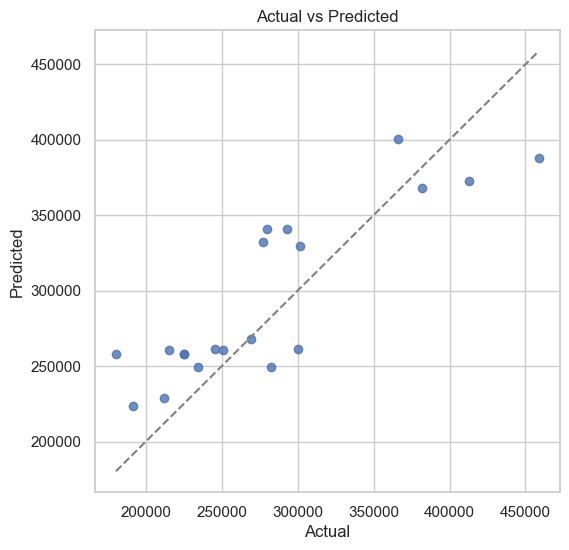

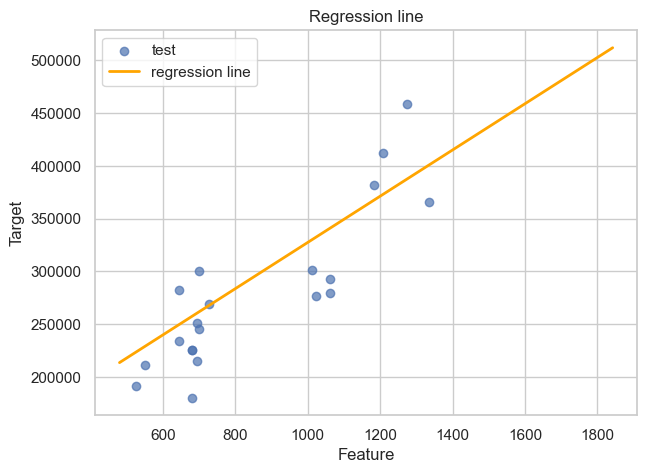

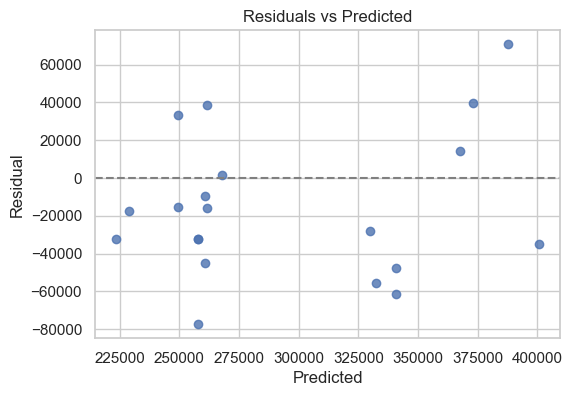

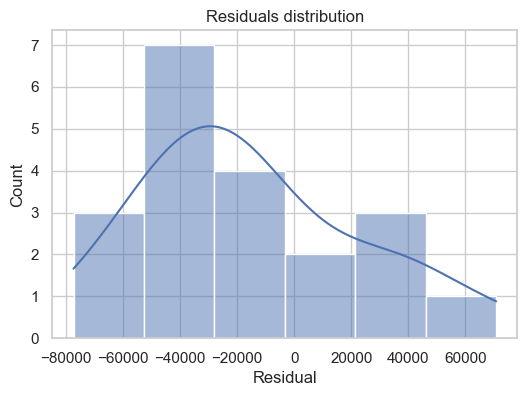

In [ ]:

sns.set(style="whitegrid")

# ensure data and model exist; if not, (re)create from x_arr, y_arr
try:
    y_pred, X_test, y_test, model
except NameError:
    X = x_arr.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y_arr, test_size=0.2, random_state=42)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

# 1) Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.8)
lims = [min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))]
plt.plot(lims, lims, '--', color='gray')  # y = x line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

# 2) Regression line over data
plt.figure(figsize=(7,5))
X_all = np.concatenate([X_test,]) if 'X' not in globals() else X
x_plot = np.linspace(X_all.min(), X_all.max(), 200).reshape(-1,1)
plt.scatter(X_test, y_test, label='test', alpha=0.7)
plt.plot(x_plot, model.predict(x_plot), color='orange', lw=2, label='regression line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Regression line")
plt.legend()
plt.show()

# 3) Residuals vs Predicted
residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.8)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted")
plt.show()

# 4) Residual distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residuals distribution")
plt.xlabel("Residual")
plt.show()
# ...existing code...

New Model

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
import os
data_path = r"C:\Users\syeda\WORK\Microsoft VS Code\WORK\python projects\1.01.+Simple+linear+regression.csv"
data = pd.read_csv(data_path)
print(data.head())

    SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83


In [17]:
x1=data['SAT']
y= data['GPA']

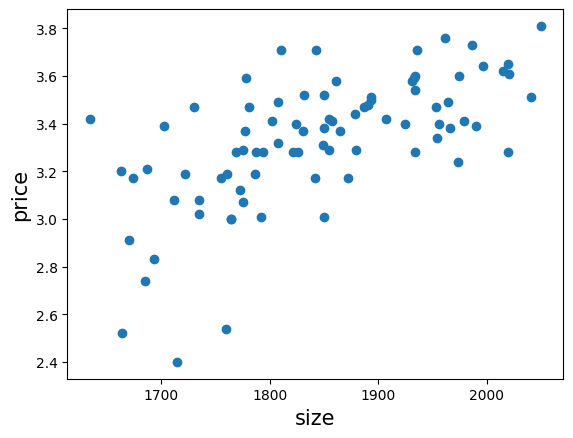

In [21]:
plt.scatter(x1,y)
plt.xlabel('size', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()

In [25]:
x_arr = x1
y_arr = y
n = len(x_arr)
b1_n = (n * np.sum(x_arr * y_arr) - np.sum(x_arr) * np.sum(y_arr)) / (
    n * np.sum(x_arr**2) - (np.sum(x_arr))**2
)

print(b1_n)

0.0016556880500928376


In [27]:

b0 = y_arr.mean() - b1_n * x_arr.mean()

print("b0:", b0)

yhat = b0 + b1_n * x_arr
print("Predicted y values (yhat):", yhat)


b0: 0.27504029966023635
Predicted y values (yhat): 0     3.112890
1     3.030105
2     3.189051
3     3.064875
4     3.078120
        ...   
79    3.480452
80    3.271836
81    3.564892
82    3.523500
83    3.669201
Name: SAT, Length: 84, dtype: float64


In [28]:
SSR = np.sum((y_arr - yhat) ** 2)
SST = np.sum((y_arr - y_arr.mean()) ** 2)
R_squared = 1 - (SSR / SST)
print("R-squared:", R_squared)
print("SSR:", SSR)
print("SST:", SST)

R-squared: 0.4060039147967974
SSR: 3.637272799580504
SST: 6.123395238095238


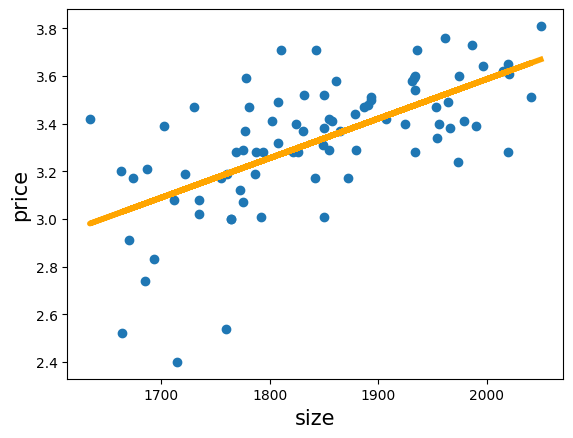

In [29]:
plt.scatter(x1,y)
yhat = b0 + b1_n * x_arr
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('size', fontsize=15)
plt.ylabel('price', fontsize=15)
plt.show()